In [47]:
#Installing plotly
#conda install -c plotly plotly

Solving environment: done

## Package Plan ##

  environment location: /Users/ashutoshshanker/opt/anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-4.14.3              |             py_0         5.9 MB  plotly
    retrying-1.3.3             |           py37_2          16 KB
    ------------------------------------------------------------
                                           Total:         5.9 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-4.14.3-py_0
  retrying           pkgs/main/osx-64::retrying-1.3.3-py37_2



plotly-4.14.3        | 5.9 MB    | ##################################### | 100% 
retrying-1.3.3       | 16 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to res

In [193]:
#Installing text2emotion
#pip install text2emotion

     |████████████████████████████████| 61kB 8.6MB/s  eta 0:00:01
     |████████████████████████████████| 133kB 13.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [213]:
#pip install raceplotly

Note: you may need to restart the kernel to use updated packages.


In [257]:
#Importing Libraries
import pandas as pd
import numpy as np
import re

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.util import ngrams
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
from raceplotly.plots import barplot
import seaborn as sns
sns.set_style('darkgrid')

import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import Isomap
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import text2emotion as te

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ashutoshshanker/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [258]:
#Reading the file
data = pd.read_csv('/Users/ashutoshshanker/Downloads/reddit_wsb.csv')

In [259]:
#Top 5 rows
data.head(5)

title  score      id  \
0  It's not about the money, it's about sending a...     55  l6ulcx   
1  Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                    Exit the system      0  l6uhhn   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4  Not to distract from GME, just thought our AMC...     71  l6ufgy   

                                                 url  comms_num       created  \
0                    https://v.redd.it/6j75regs72e61          6  1.611863e+09   
1                    https://v.redd.it/ah50lyny62e61         23  1.611862e+09   
2  https://www.reddit.com/r/wallstreetbets/commen...         47  1.611862e+09   
3  https://sec.report/Document/0001193125-21-019848/         74  1.611862e+09   
4                https://i.redd.it/4h2sukb662e61.jpg        156  1.611862e+09   

                                                body            timestamp  
0                                                NaN  2021-01-28 21:37:41  
1                                                NaN  2021-01-28 21:32:10  
2  The CEO of NASDAQ pushed to halt trading “to g...  2021-01-28 21:30:35  
3                                                NaN  2021-01-28 21:28:57  
4                                                NaN  2021-01-28 21:26:56

In [260]:
#Columns in the dataset
data.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp'],
      dtype='object')

In [261]:
data.shape

(32932, 8)

In [262]:
data.timestamp.value_counts

<bound method IndexOpsMixin.value_counts of 0        2021-01-28 21:37:41
1        2021-01-28 21:32:10
2        2021-01-28 21:30:35
3        2021-01-28 21:28:57
4        2021-01-28 21:26:56
                ...         
32927    2021-02-08 10:48:12
32928    2021-02-08 10:45:05
32929    2021-02-08 10:37:53
32930    2021-02-08 10:33:54
32931    2021-02-08 10:32:40
Name: timestamp, Length: 32932, dtype: object>

<b>Average Length of the column 'title'

In [263]:
data['len'] = data['title'].apply(lambda x: len(x.split(' ')))
ex.histogram(data['len'], template='plotly_dark')

Length of title is between 0-20, this is because the title is generally short

In [266]:
# Creating the sentiments 
from IPython.display import clear_output
t=[]
count=0
#print(len(data))
for i in data['title'].values:
    count+=1
    print(count*100/len(data))
    clear_output(wait=True)
    t.append(te.get_emotion(i))
t=np.array(t)


100.0


In [267]:
t

array([{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0},
       {'Happy': 0.0, 'Angry': 0.25, 'Surprise': 0.25, 'Sad': 0.25, 'Fear': 0.25},
       {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0},
       ...,
       {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0},
       {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0},
       {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}],
      dtype=object)

In [268]:
data['overall_comment'] = data.title+" "+ data.body.astype("str")
data['Happy']=[dict(i)['Happy'] for i in t]
data['Angry']=[dict(i)['Angry'] for i in t]
data['Surprise']=[dict(i)['Surprise'] for i in t]
data['Sad']=[dict(i)['Sad'] for i in t]
data['Fear']=[dict(i)['Fear'] for i in t]
dominant=[]
for i in t:
    p=dict(i)
    Keymax = max(p, key=p.get)
    dominant.append(Keymax)
data['dominant_emotion']=dominant
day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date']=data['timestamp'].dt.day
data['weekday']=data['timestamp'].dt.weekday
data['weekday']=data['weekday'].apply(lambda x: day_name[x])
data['hour']=data['timestamp'].dt.hour


In [269]:
# Distribution of posts over weekday
ex.histogram(data, x='weekday', color='weekday', template='plotly_dark')

In [270]:
# Daily distribution of posts 
ex.histogram(data, x='date', color = 'date', template = 'plotly_dark')

It can be observed that the maximum number of posts were created on January 29, 2021. 

<b> What happened on January 29,2021?

1. The past few days had been extremely volatile for the game retailer's stock and with Friday's close it gained 400% since last Friday, 1,784% since the start of 2021 and nearly 8,170% since this date last year. That was largely because an army of traders in a Reddit group were buying the stock to hurt short sellers, the hedge funds that have bet against GameStop.

2. The Dow and the S&P 500 recorded their first monthly losses since October. For the week, the two indexes, as well as the Nasdaq Composite, also logged losses.

For more information please refer: https://www.cnn.com/business/live-news/wallstreetbets-reddit-wall-street-gamestop/index.html 

In [303]:
data.date.unique()

array([28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [271]:
# People's reaction from Friday to Thursday
data_emotions = pd.DataFrame()
data_emotions['Emotions']=data['dominant_emotion']
data_emotions['Day']=data['weekday']
data_emotions['Count']=[1]*len(data_emotions)
grouped_data_emotions = data_emotions.groupby(['Day','Emotions']).sum()
index_1=np.array(list(grouped_data_emotions.index))
index_1

data_emotions2 = pd.DataFrame()
data_emotions2['Day'] = index_1[:,0]
data_emotions2['Emotions'] = index_1[:,1]
data_emotions2['Count']=grouped_data_emotions.values
plot_1 = barplot(data_emotions2,
                item_column='Emotions',
                value_column='Count',
                time_column='Day')

plot_1.plot(title = 'Emotions In The Dataset',
          item_label = 'Emotions',
          value_label = 'Count Of Total Values On That Day',
          frame_duration = 800)

In [273]:
# People's reaction on Friday as the day continued
data_emotions = pd.DataFrame()
dn_Fri=data[data['weekday']=='Friday']
data_emotions['Emotions']=dn_Fri['dominant_emotion']
data_emotions['Hour']=dn_Fri['hour']
data_emotions['Count']=[1]*len(data_emotions)
grouped_data_emotions = data_emotions.groupby(['Hour','Emotions']).sum()
index_1=np.array(list(grouped_data_emotions.index))
index_1

data_emotions2 = pd.DataFrame()
data_emotions2['Hour'] = index_1[:,0]
data_emotions2['Emotions'] = index_1[:,1]
data_emotions2['Count']=grouped_data_emotions.values
data_emotions2['Hour']=data_emotions2['Hour'].apply(lambda x : int(x))
data_emotions2.sort_values('Hour',inplace=True)
plot_1 = barplot(data_emotions2,
                item_column='Emotions',
                value_column='Count',
                time_column='Hour')

plot_1.plot(title = 'Emotions In The Dataset On Friday',
          item_label = 'Emotions',
          value_label = 'Count Of Total Values On That Day',
          frame_duration = 800)


In [274]:
# Most common domains shared in column 'URL'
text_link=[]
for i in data['url']:
    t=i
    if '/' in t:
        t=t.split('/')[2]
    if 'www.' in t:
        t=t.split('www.')[1]
    if '.com' in t:
        t=t.split('.com')[0]
    text_link.append(t)
text_link=pd.DataFrame(columns=['text'],data=text_link)
s=' '
for i in text_link['text'].values:
    s+=' '+i
text_link=text_link['text'].value_counts()
ex.bar(x=text_link.index[0:10], y=text_link.values[:10],color=text_link.index[:10], template='plotly_dark', labels={'x':'Websites',
                                                                                                        'y':'Count'})


In [275]:
# Most dominant emotion according to the count of posts
comm_emot = data.groupby('dominant_emotion').sum()
ex.bar(x=comm_emot.index, y=comm_emot['comms_num'].values, color=comm_emot.index, template='plotly_dark',
      labels={'x':'Emotions','y':'Number of comments'})

In [276]:
# Relationaship between emotion and score
comm_emot = data.groupby('dominant_emotion').sum()
ex.bar(x=comm_emot.index, y=comm_emot['score'].values, color=comm_emot.index, template='plotly_dark',
      labels={'x':'Emotions','y':'Number of comments'})

In [304]:
t_title = []
for title in data.title:
    t_title.append(title)
    
def title_split(title):
    split_n = str(title).split(' ')
    return split_n

t_title_count = []
for i in t_title:
    for word in title_split(i):
        word = word.lower()
        t_title_count.append(word)

In [305]:
from collections import Counter
#top 25 used words in title
Top_25_words=Counter(t_title_count).most_common()
Top_25_words=Top_25_words[0:25]

In [306]:
Top_25_words

[('the', 12971),
 ('to', 9898),
 ('and', 6101),
 ('is', 5444),
 ('i', 5378),
 ('a', 5022),
 ('gme', 4332),
 ('of', 4079),
 ('this', 3848),
 ('on', 3842),
 ('you', 3669),
 ('for', 3454),
 ('in', 3436),
 ('buy', 3069),
 ('we', 2921),
 ('my', 2705),
 ('not', 2423),
 ('are', 2410),
 ('robinhood', 2326),
 ('hold', 2317),
 ('it', 2198),
 ('amc', 1757),
 ('all', 1728),
 ('can', 1706),
 ('just', 1693)]

In [307]:
viz_1=sns.barplot(x='title', y='Count', data=data.title)
viz_1.set_title('Counts of the top 25 used title for listing names')
viz_1.set_ylabel('Count of words')
viz_1.set_xlabel('title')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)

ValueError: Could not interpret input 'title'

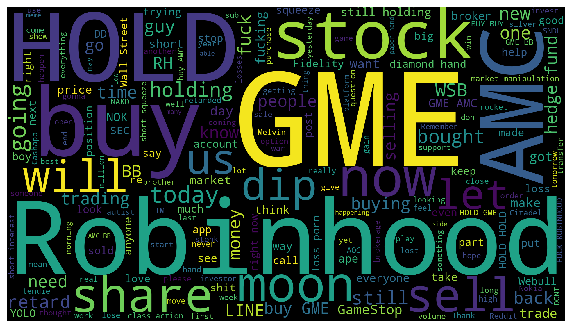

In [280]:
# Plotting the word cloud to find most occured words in column 'Title'
plt.subplots(figsize=(10,6))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Title.png')
plt.show()

KeyError: 'dominant_emotions'

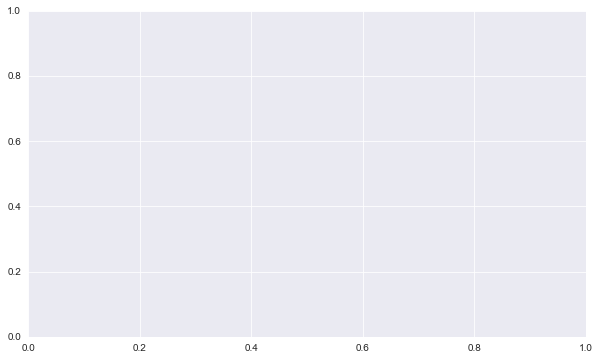

In [252]:
# Plotting the word cloud
plt.subplots(figsize=(10,6))
k=0
j=0
for i in ['Sad','Fear','Surprise','Angry','Happy']:
    data_wc=data[data['dominant_emotion']==i]
    text_link =" ".join(data_wc(''))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Title.png')
plt.show()

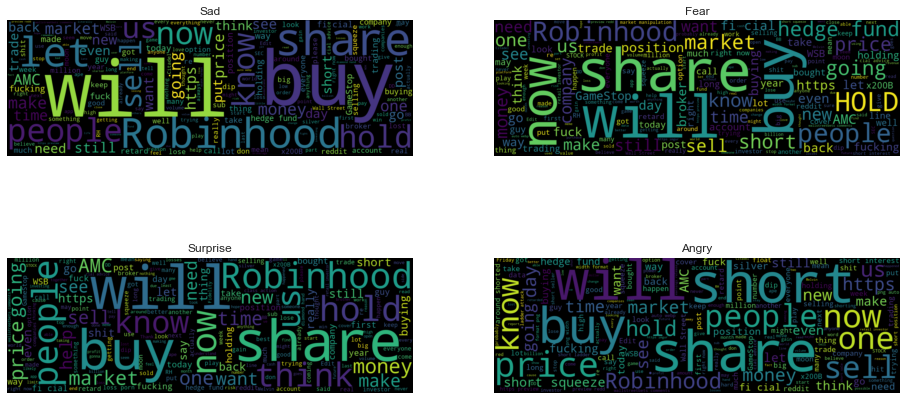

In [278]:
# Wordplot for being angry,sad,emotional
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
k=0
j=0
for i in ['Sad','Fear','Surprise','Angry']:
    dd=data[data['dominant_emotion']==i]
    text=" ".join(dd['overall_comment'])
    text=text.replace("stock",' ')
    text=text.replace("GME"," ")
    text=text.replace("nan",' ')
    wordcloud = WordCloud(width=1500, height=500).generate(text)

    ax[k,j].imshow(wordcloud, interpolation='bilinear')
    ax[k,j].set_title(i)
    ax[k, j].set_axis_off()
    j+=1
    if j>1:
        k+=1
        j=0
        


# Trends in Emotions

In [285]:
data["data_count"] = 1
by_day = data.groupby("date").aggregate({"score": "mean", "comms_num": "mean", "data_count": "sum"})
by_hour = data.groupby(["date", "hour"]).aggregate({"score": "mean", "comms_num": "mean", "data_count": "sum"})

In [290]:
# Average of reddit post score (a metric of engagement on a post) by hour
pd.options.plotting.backend = "plotly"
by_hour.reset_index().plot(y="score")


In [287]:
# Average of reddit post comment count by hour
by_hour.reset_index().plot(y="comms_num")

In [288]:
# Average of the count of total posts by hour
by_hour.reset_index().plot(y = "data_count")

In [291]:
# Average of reddit post comment count by day
by_day.plot(y = "comms_num")

In [292]:
# Average of reddit post score (a metric of engagement on a post) by day
by_day.plot(y = "score")

In [293]:
# Average of the count of total posts by day
by_day.plot(y = "data_count")

In [296]:
by_day = data.groupby("date").mean()
by_hour = data.groupby(["date", "hour"]).mean()

In [301]:
# Ratio of words of each emotion by hour
fig = by_hour.reset_index().plot(y = "Happy", labels={
                     "Happy": "Ratio of words of each emotion", 
                     "Index": "Hours since 9:00am on 1/28/2021"
                 },
                title="Trends in emotions expressed in r/WallStreetBets posts by hour")
fig.add_scatter(y=by_hour['Sad'], mode='lines', name = "Sad")
fig.add_scatter(y=by_hour['Angry'], mode='lines', name = "Angry")
fig.add_scatter(y=by_hour['Surprise'], mode='lines', name = "Surprise")
fig.add_scatter(y=by_hour['Fear'], mode='lines', name = "Fear")
fig.show()

In [302]:
# Ratio of words of each emotion by day
fig = by_day.reset_index().plot(y = "Happy", labels={
                     "Happy": "Ratio of words of each emotion", 
                     "Index": "Days since 1/28/2021"
                 },
                title="Trends in emotions expressed in r/WallStreetBets posts by day")
fig.add_scatter(y=by_day['Sad'], mode='lines', name = "Sad")
fig.add_scatter(y=by_day['Angry'], mode='lines', name = "Angry")
fig.add_scatter(y=by_day['Surprise'], mode='lines', name = "Surprise")
fig.add_scatter(y=by_day['Fear'], mode='lines', name = "Fear")
fig.show()

In [146]:
# Creating two separate tables title_data and body_data
title_data = data[['title','timestamp']].copy()
body_data = data[['body','timestamp']].copy()
body_data = body_data.dropna()
title_data = title_data.dropna()

In [147]:
title_data

title            timestamp
0      It's not about the money, it's about sending a...  2021-01-28 21:37:41
1      Math Professor Scott Steiner says the numbers ...  2021-01-28 21:32:10
2                                        Exit the system  2021-01-28 21:30:35
3      NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  2021-01-28 21:28:57
4      Not to distract from GME, just thought our AMC...  2021-01-28 21:26:56
...                                                  ...                  ...
32927                   Why to REALLY buy GME (Solid DD)  2021-02-08 10:48:12
32928                               The Chinese New Year  2021-02-08 10:45:05
32929                        GME gain porn - 5.8k to 75k  2021-02-08 10:37:53
32930  My fellow 🚀nauts, Why $ZOM =🚀 🚀 - A simplistic DD  2021-02-08 10:33:54
32931  $API (Agora) - No need to draw trend lines or ...  2021-02-08 10:32:40

[32932 rows x 2 columns]

In [148]:
body_data

body            timestamp
2      The CEO of NASDAQ pushed to halt trading “to g...  2021-01-28 21:30:35
6      Hedgefund whales are spreading disinfo saying ...  2021-01-28 21:26:27
7      Life isn't fair. My mother always told me that...  2021-01-28 21:19:31
10      I believe right now is one of those rare oppo...  2021-01-28 21:18:25
12     You guys are champs. GME... who would have tho...  2021-01-28 21:17:10
...                                                  ...                  ...
32919  I’ve been thinking about what becomes of a bro...  2021-02-08 11:47:30
32924  Disclaimer I don’t own game but I do find this...  2021-02-08 10:57:21
32927  LEGITIMATE ARGUMENT TO INVEST IN GME AT THESE ...  2021-02-08 10:48:12
32928  I’ve seen both views online about what may hap...  2021-02-08 10:45:05
32930  if you love money, pls read & don't delete\n\n...  2021-02-08 10:33:54

[17197 rows x 2 columns]

In [149]:
# Converting all letters in column 'title' to lower
title_data.title = title_data.title.str.lower()
title_data

title            timestamp
0      it's not about the money, it's about sending a...  2021-01-28 21:37:41
1      math professor scott steiner says the numbers ...  2021-01-28 21:32:10
2                                        exit the system  2021-01-28 21:30:35
3      new sec filing for gme! can someone less retar...  2021-01-28 21:28:57
4      not to distract from gme, just thought our amc...  2021-01-28 21:26:56
...                                                  ...                  ...
32927                   why to really buy gme (solid dd)  2021-02-08 10:48:12
32928                               the chinese new year  2021-02-08 10:45:05
32929                        gme gain porn - 5.8k to 75k  2021-02-08 10:37:53
32930  my fellow 🚀nauts, why $zom =🚀 🚀 - a simplistic dd  2021-02-08 10:33:54
32931  $api (agora) - no need to draw trend lines or ...  2021-02-08 10:32:40

[32932 rows x 2 columns]

In [150]:
# Converting all letters in column 'body' to lower
body_data.body =body_data.body.str.lower()
body_data

body            timestamp
2      the ceo of nasdaq pushed to halt trading “to g...  2021-01-28 21:30:35
6      hedgefund whales are spreading disinfo saying ...  2021-01-28 21:26:27
7      life isn't fair. my mother always told me that...  2021-01-28 21:19:31
10      i believe right now is one of those rare oppo...  2021-01-28 21:18:25
12     you guys are champs. gme... who would have tho...  2021-01-28 21:17:10
...                                                  ...                  ...
32919  i’ve been thinking about what becomes of a bro...  2021-02-08 11:47:30
32924  disclaimer i don’t own game but i do find this...  2021-02-08 10:57:21
32927  legitimate argument to invest in gme at these ...  2021-02-08 10:48:12
32928  i’ve seen both views online about what may hap...  2021-02-08 10:45:05
32930  if you love money, pls read & don't delete\n\n...  2021-02-08 10:33:54

[17197 rows x 2 columns]

In [151]:
title_data.title

0        it's not about the money, it's about sending a...
1        math professor scott steiner says the numbers ...
2                                          exit the system
3        new sec filing for gme! can someone less retar...
4        not to distract from gme, just thought our amc...
                               ...                        
32927                     why to really buy gme (solid dd)
32928                                 the chinese new year
32929                          gme gain porn - 5.8k to 75k
32930    my fellow 🚀nauts, why $zom =🚀 🚀 - a simplistic dd
32931    $api (agora) - no need to draw trend lines or ...
Name: title, Length: 32932, dtype: object

In [152]:
title_data.title = title_data.title.apply(lambda x:re.sub('@[^\s]+','',x))
body_data.body   = body_data.body.apply(lambda x:re.sub('@[^\s]+','',x))

In [153]:
# Remove URLS
title_data.title = title_data.title.apply(lambda x:re.sub(r"http\S+", "", x))
body_data.body   = body_data.body.apply(lambda x:re.sub(r"http\S+", "", x))

In [154]:
# Remove all the special characters
title_data.title = title_data.title.apply(lambda x:' '.join(re.findall(r'\w+', x)))
body_data.body   = body_data.body.apply(lambda x:' '.join(re.findall(r'\w+', x)))

In [155]:
title_data.title = title_data.title.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [156]:
# Substituting multiple spaces with single space
title_data.title = title_data.title.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [157]:
#Remove Time From Timestamp
title_data.timestamp = pd.to_datetime(title_data.timestamp).dt.date
body_data.timestamp = pd.to_datetime(body_data.timestamp).dt.date

In [158]:
#Sentiment Analysis using SentimentIntensityAnalyzer
sid = SIA()
body_data['sentiments'] = body_data['body'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))

In [159]:
body_data

body   timestamp  \
2      the ceo of nasdaq pushed to halt trading to gi...  2021-01-28   
6      hedgefund whales are spreading disinfo saying ...  2021-01-28   
7      life isnfair my mother always told me that whe...  2021-01-28   
10     i believe right now is one of those rare oppor...  2021-01-28   
12     you guys are champs gme who would have thought...  2021-01-28   
...                                                  ...         ...   
32919  i ve been thinking about what becomes ofbroker...  2021-02-08   
32924  disclaimerdonown game butdo find this whole th...  2021-02-08   
32927  legitimate argument to invest in gme at these ...  2021-02-08   
32928  i ve seen both views online about what may hap...  2021-02-08   
32930  if you love money pls read dondelete thanks x2...  2021-02-08   

                                              sentiments  
2      {'neg': 0.045, 'neu': 0.906, 'pos': 0.049, 'co...  
6      {'neg': 0.06, 'neu': 0.913, 'pos': 0.026, 'com...  
7      {'neg': 0.163, 'neu': 0.773, 'pos': 0.065, 'co...  
10     {'neg': 0.086, 'neu': 0.762, 'pos': 0.152, 'co...  
12     {'neg': 0.051, 'neu': 0.832, 'pos': 0.117, 'co...  
...                                                  ...  
32919  {'neg': 0.056, 'neu': 0.825, 'pos': 0.119, 'co...  
32924  {'neg': 0.07, 'neu': 0.854, 'pos': 0.076, 'com...  
32927  {'neg': 0.073, 'neu': 0.801, 'pos': 0.126, 'co...  
32928  {'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...  
32930  {'neg': 0.01, 'neu': 0.8, 'pos': 0.19, 'compou...  

[17197 rows x 3 columns]

In [141]:
body_data['Positive Sentiment'] = body_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
body_data['Neutral Sentiment'] = body_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
body_data['Negative Sentiment'] = body_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

In [142]:
body_data.drop(columns=['sentiments'],inplace=True)

In [145]:
body_data

body   timestamp  \
2      The CEO of NASDAQ pushed to halt trading to gi...  2021-01-28   
6      Hedgefund whales are spreading disinfo saying ...  2021-01-28   
7      Life isnfair My mother always told me that whe...  2021-01-28   
10     I believe right now is one of those rare oppor...  2021-01-28   
12     You guys are champs GME who would have thought...  2021-01-28   
...                                                  ...         ...   
32919  I ve been thinking about what becomes ofbroker...  2021-02-08   
32924  Disclaimerdonown game butdo find this whole th...  2021-02-08   
32927  LEGITIMATE ARGUMENT TO INVEST IN GME AT THESE ...  2021-02-08   
32928  I ve seen both views online about what may hap...  2021-02-08   
32930  if you love money pls read dondelete thanks x2...  2021-02-08   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  
2                0.049001           0.906001            0.045001  
6                0.026001           0.913001            0.060001  
7                0.065001           0.773001            0.163001  
10               0.152001           0.762001            0.086001  
12               0.117001           0.832001            0.051001  
...                   ...                ...                 ...  
32919            0.119001           0.825001            0.056001  
32924            0.076001           0.854001            0.070001  
32927            0.126001           0.801001            0.073001  
32928            0.077001           0.923001            0.000001  
32930            0.190001           0.800001            0.010001  

[17197 rows x 5 columns]

In [143]:
title_data['sentiments'] = title_data['title'].apply(lambda x:  sid.polarity_scores(
    ' '.join(re.findall(r'\w+',x.lower()))))

In [144]:
title_data['Positive Sentiment'] = title_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6))
title_data['Neutral Sentiment'] = title_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
title_data['Negative Sentiment'] = title_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

In [89]:
title_data.drop(columns=['sentiments'],inplace=True)

In [90]:
title_data

title   timestamp  \
0           itnot about the money itabout sendingmessage  2021-01-28   
1      math professor scott steiner says the numbers ...  2021-01-28   
2                                        exit the system  2021-01-28   
3      new sec filing for gme can someone less retard...  2021-01-28   
4      not to distract from gme just thought our amc ...  2021-01-28   
...                                                  ...         ...   
32927                     why to really buy gme solid dd  2021-02-08   
32928                               the chinese new year  2021-02-08   
32929                          gme gain porn 5 8k to 75k  2021-02-08   
32930               my fellow nauts why zomsimplistic dd  2021-02-08   
32931  api agora no need to draw trend lines or fibs ...  2021-02-08   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  
0                0.000001           1.000001            0.000001  
1                0.000001           0.728001            0.272001  
2                0.000001           1.000001            0.000001  
3                0.138001           0.658001            0.204001  
4                0.119001           0.881001            0.000001  
...                   ...                ...                 ...  
32927            0.237001           0.763001            0.000001  
32928            0.000001           1.000001            0.000001  
32929            0.405001           0.595001            0.000001  
32930            0.000001           1.000001            0.000001  
32931            0.093001           0.836001            0.071001  

[32932 rows x 5 columns]

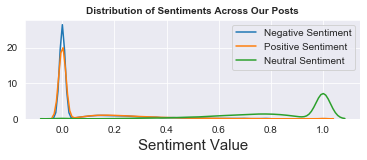

In [107]:
plt.subplot(2,1,1)
plt.title('Distribution of Sentiments Across Our Posts', fontsize=10, fontweight='bold')
sns.kdeplot(title_data['Negative Sentiment'])
sns.kdeplot(title_data['Positive Sentiment'])
sns.kdeplot(title_data['Neutral Sentiment'])
plt.xlabel('Sentiment Value', fontsize=15)
plt.show()

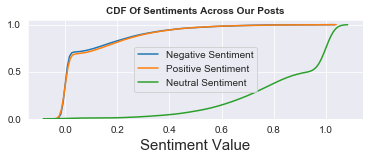

In [106]:
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Posts',fontsize=10,fontweight='bold')
sns.kdeplot(title_data['Negative Sentiment'],cumulative=True)
sns.kdeplot(title_data['Positive Sentiment'],cumulative=True)
sns.kdeplot(title_data['Neutral Sentiment'],cumulative=True)
plt.xlabel('Sentiment Value',fontsize=15)
plt.show()

In [108]:
body_data['# Of Words']=body_data['body'].apply(lambda x:len(x.split(' ')))
body_data['# Of StopWords']=body_data['body'].apply(lambda x:len([word for word in x.split(' ') if word in list(STOPWORDS)]))
body_data['Average Word Length']=body_data['body'].apply(lambda x: np.mean(np.array([len(va) for va in x.split(' ') if va not in list(STOPWORDS)])))

/Users/ashutoshshanker/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning:

Mean of empty slice.



In [109]:
title_data['# of Words']=title_data['title'].apply(lambda x:len(x.split(' ')))
title_data['# of StopWords']=title_data['title'].apply(lambda x:len([word for word in x.split(' ') if word in list(STOPWORDS)]))
title_data['Average Word Length']=title_data['title'].apply(lambda x: np.mean(np.array([len(va) for va in x.split(' ') if va not in list(STOPWORDS)])))

In [111]:
#Sorting And Feature Engineering
f_data = title_data.sort_values(by='timestamp')
ft_data=f_data.copy()
ft_data=ft_data.rename(columns={'timestamp':'date'})
ft_data['year']=pd.DatetimeIndex(ft_data['date']).year
ft_data['month']=pd.DatetimeIndex(ft_data['date']).month
ft_data['day']=pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']=pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']=pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']=ft_data.month%12//3+1

In [114]:
ft_data

title        date  \
0           itnot about the money itabout sendingmessage  2021-01-28   
801                                      no restrictions  2021-01-28   
800                  down from 4 4 this morning movement  2021-01-28   
799                                robinhood shenanigans  2021-01-28   
798                                        whathapenning  2021-01-28   
...                                                  ...         ...   
32224           my 50k yolo on trvg and why it ll to the  2021-02-13   
32225                                      pltr earnings  2021-02-13   
32226  nrdragefriday dd therestill one meme stock tha...  2021-02-13   
32215                          0118 999 881 999 119 7253  2021-02-13   
32231  can we talk about mvis yet 1000 shares at 1 89...  2021-02-13   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  # of Words  \
0                0.000001           1.000001            0.000001           6   
801              0.000001           0.312001            0.688001           2   
800              0.000001           1.000001            0.000001           7   
799              0.000001           1.000001            0.000001           2   
798              0.000001           1.000001            0.000001           1   
...                   ...                ...                 ...         ...   
32224            0.174001           0.826001            0.000001          11   
32225            0.000001           1.000001            0.000001           2   
32226            0.090001           0.742001            0.168001          21   
32215            0.000001           1.000001            0.000001           6   
32231            0.167001           0.833001            0.000001          13   

       # of StopWords  Average Word Length  year  month  day  day_of_year  \
0                   2             7.750000  2021      1   28           28   
801                 1            12.000000  2021      1   28           28   
800                 3             4.250000  2021      1   28           28   
799                 0            10.000000  2021      1   28           28   
798                 0            13.000000  2021      1   28           28   
...               ...                  ...   ...    ...  ...          ...   
32224               7             3.250000  2021      2   13           44   
32225               0             6.000000  2021      2   13           44   
32226               4             5.705882  2021      2   13           44   
32215               0             3.333333  2021      2   13           44   
32231               5             3.875000  2021      2   13           44   

       quarter  season  
0            1       1  
801          1       1  
800          1       1  
799          1       1  
798          1       1  
...        ...     ...  
32224        1       1  
32225        1       1  
32226        1       1  
32215        1       1  
32231        1       1  

[32932 rows x 14 columns]